# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv("data/Climate_Change_Indicators.csv") # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
year ="Year"
avg_temperature="Global Average Temperature (°C)"
co2_concentration="CO2 Concentration (ppm)"
sea_level_rise="Sea Level Rise (mm)"
artic_ice_area="Arctic Ice Area (million km²)"

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [5]:
# TODO: Aggregate data by year to create a 124-year time series
yearly_data=df.groupby("Year")[[avg_temperature, co2_concentration,sea_level_rise,artic_ice_area]].mean().reset_index()
yearly_data.head()




,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


In [6]:
yearly_data.count()

Year                               124
Global Average Temperature (°C)    124
CO2 Concentration (ppm)            124
Sea Level Rise (mm)                124
Arctic Ice Area (million km²)      124
dtype: int64

## 2. Univariate Analysis

Analyze each climate variable independently.

In [7]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
print(yearly_data.describe()) #Descriptive statistics



              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748             

Visualizations:


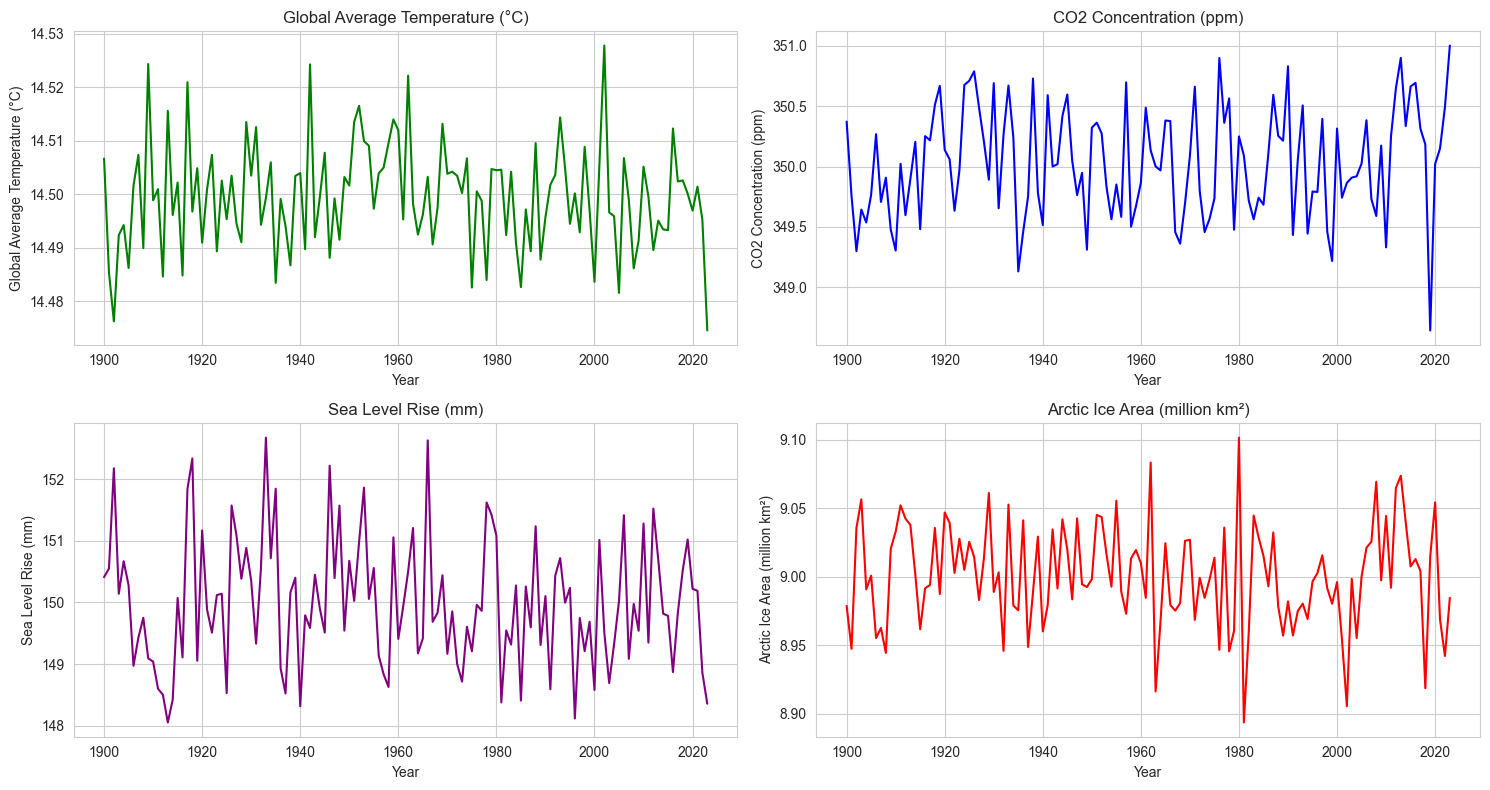

In [8]:
# visualizations (histograms, box plots, time series plots)
print("Visualizations:")
fig, axes = plt.subplots(2, 2, figsize=(15,8))
# line plot for Global Average Temperature vs year
data=yearly_data
sns.lineplot(data=yearly_data, x="Year", y="Global Average Temperature (°C)",ax=axes[0,0], color='green')
axes[0,0].set_title(avg_temperature)
# line plot for CO2 Concentration vs year
sns.lineplot(data=yearly_data, x="Year", y="CO2 Concentration (ppm)",ax=axes[0,1], color='blue')
axes[0,1].set_title(co2_concentration)
#lineplot for sea level rise(mm) vs year
sns.lineplot(data=yearly_data, x="Year", y="Sea Level Rise (mm)",ax=axes[1,0], color='purple')
axes[1,0].set_title(sea_level_rise)
#lineplot for Arctic Ice area vs Year
sns.lineplot(data=yearly_data, x="Year", y="Arctic Ice Area (million km²)",ax=axes[1,1], color='red')
axes[1,1].set_title( artic_ice_area)
plt.tight_layout()
plt.show()







Histograms analysis on Global Average Temperature:


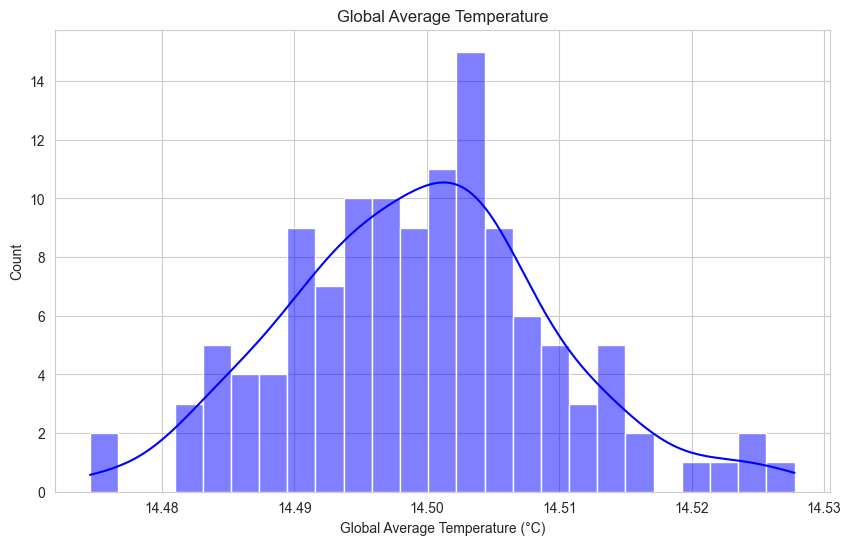

count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


In [9]:
#histogram plot for Global Average Temperature
print("Histograms analysis on Global Average Temperature:")
plt.figure(figsize=(10, 6))
sns.histplot(yearly_data[avg_temperature],kde='True',bins=25,color='blue')
plt.title("Global Average Temperature")
plt.show()
print(yearly_data[avg_temperature].describe())

density plot for co2 concentration


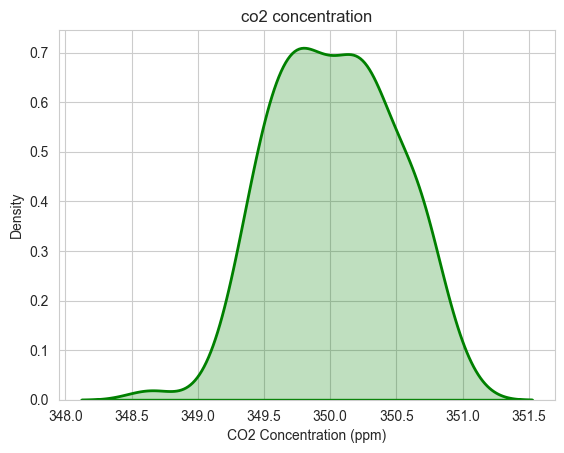

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


In [10]:
#densityplot for CO2 Concentration (ppm)	
print("density plot for co2 concentration")
sns.kdeplot(yearly_data[co2_concentration],fill=True,linewidth=2,color='green')
plt.title("co2 concentration")
plt.show()
print(yearly_data[co2_concentration].describe())

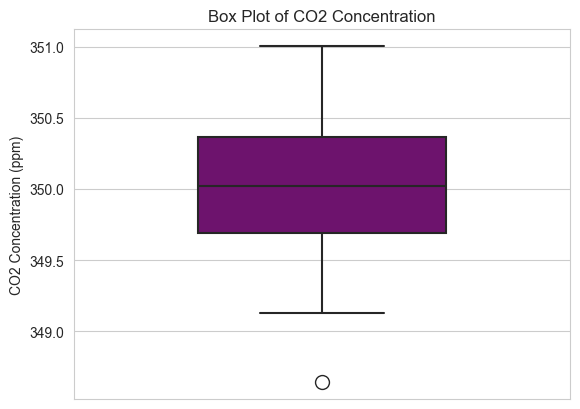

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


In [11]:
#Boxplot for sea level rise
sns.boxplot(data=yearly_data[co2_concentration],color="purple", linewidth=1.5, width=0.5, fliersize=10, saturation=0.7)
plt.title('Box Plot of CO2 Concentration')
plt.show()
print(yearly_data[co2_concentration].describe())


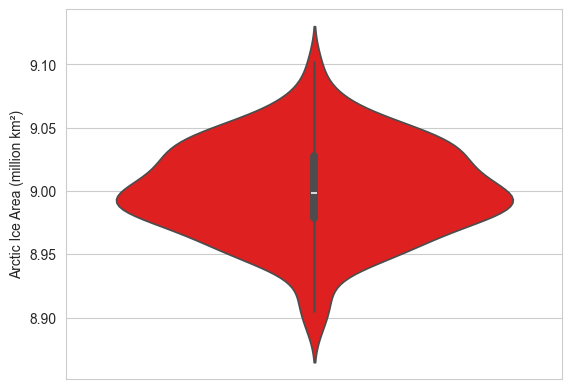

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


In [14]:
#violinplot for Artic Ice Area
sns.violinplot(data=yearly_data[artic_ice_area],color='red')
plt.show()
print(yearly_data[artic_ice_area].describe())

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here